# Capítulo 6. Implementación de modelos de programación lineal

Existen otros Paquetes que se pueden usar para la resolución de modelos. Los más comunes, dependiendo del tipo de modelo son: 

- **Gurobipy**
- **Xpress**
- CVXOpt
- PuLP
- OpenOpt
- Pyomo-Coopr

En esta ocación procederemos a implementar y resolver modelos lineales con el paquete **gurobipy**.

## Gurobipy:

Gurobipy es un paquete desarrollado por Gurobi Optimization. Para uso educativo es de uso libre, sin embargo, si se desea usar de forma profesional es necesario comprar una licencia.

## Instalación:

Para la instalación podemos ejecutar el comando `pip install gurobipy`.

In [ ]:
pip install gurobipy

### Solver:

Los solvers más comunes para resolución AMPL son:

- CPLEX
- **GUROBI**
- XPRESS
- CONOPT
- KNITRO
- LOQO
- MINOS
- SNOPT
- BARON
- LGO
- LINDO GLOBAL

En esta ocación el paquete de `gurobipy` emplea el solver de `Gurobi`.
- Por defecto se instala una licencia de uso gratuito (contiene ciertas limitaciones).
- Para motivos académicos se puede solicitar una licencia académica (válida solo por un año).
https://www.gurobi.com/academia/academic-program-and-licenses/
- Si se quiere usar de forma profesional se debe comprar una licencia.

In [ ]:
import gurobipy
help(gurobipy)

## Qué es un modelo matemático...???

Transcribir un problema del lenguaje cotidiano al lenguaje matemático.

### Qué es un modelo de optimización ...???

Existen diferentes tipos de problemas, y por lo tanto, diferentes modelos matemáticos. En este curso nos interesan los modelos de optimización lineal.

**Ejemplo:**
Intentar encontrar la solución óptima del siguiente problema:

$$
\begin{align*}
    \min x + y \\
    x + 2y \geq 5\\
    4x + y \geq 6
\end{align*}
$$

Lograstes encontrar la solución... ??? 

Igualamos los sistemas
$$
\left\{ \begin{array}{l}
x = 5 - 2y \\
4x + y = 6
\end{array} \right.
$$
Resolvemos el sistema lineal
$$
6 = 4(5-2y) + y = 20 - 7 y
$$
equivalentemente,
$$
y = 14/7 = 2 \quad \Longrightarrow \quad x = 5 - 2(2) = 1.
$$
Por lo tanto, la solución del problema es: $x+y = 1 + 2 = 3$.

A continuación vamos a encontrar la solución de forma gráfica.

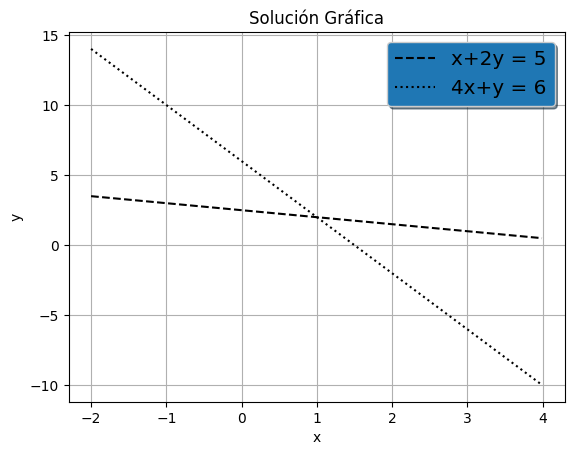

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# construimos las rectas como puntos (x,y)
x1 = np.arange(-2.0, 4.0, 0.01)
y1 = (5 - x1)/2

x2 = np.arange(-2.0, 4.0, 0.01)
y2 = 6 - 4*x2

# Creamos un grafico usando subplots
fig, ax = plt.subplots()
ax.plot(x1, y1, 'k--', label='x+2y = 5')
ax.plot(x2, y2, 'k:', label='4x+y = 6')
ax.grid() # agregamos una cuadricula
ax.set(xlabel='x', ylabel='y',
       title='Solución Gráfica') # agregamos un titulo y los nombres de los ejes.

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large') # agregamos una leyenda.

# Cambiamos el color de la leyenda a uno mas nice (#C1F80A)
legend.get_frame().set_facecolor('C0')

plt.show()

In [2]:
import matplotlib.colors as mat_colors
mat_colors.BASE_COLORS

{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1)}

Podemos colorear los semiplanos para visualizar el poliedro sobre el cual se encuentra la solución.

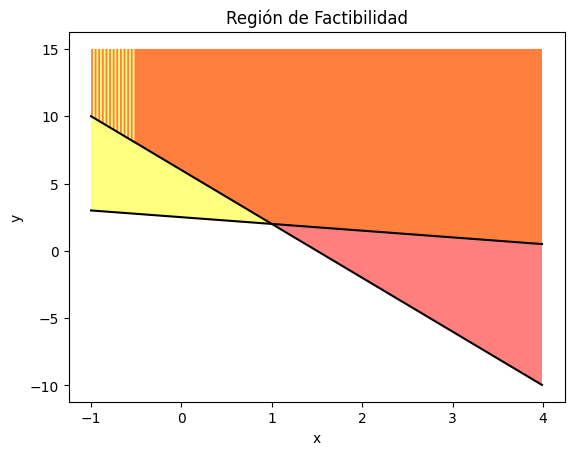

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-1.0, 4.0, 0.01)
y1 = (5 - x)/2
y2 = 6 - 4*x

fig, ax = plt.subplots()
ax.plot(x, y1, x, y2, color='black')

ax.fill_between(x, y1, 15, where=(x + 2*y1 >= 5), facecolor='yellow', alpha=0.5)
ax.fill_between(x, y2, 15, where=(4*x + y2 >= 6), facecolor='red', alpha=0.5)

ax.set(xlabel='x', ylabel='y', title='Región de Factibilidad')

plt.show()

Combinemos los dos gráficos para mejorarlo.

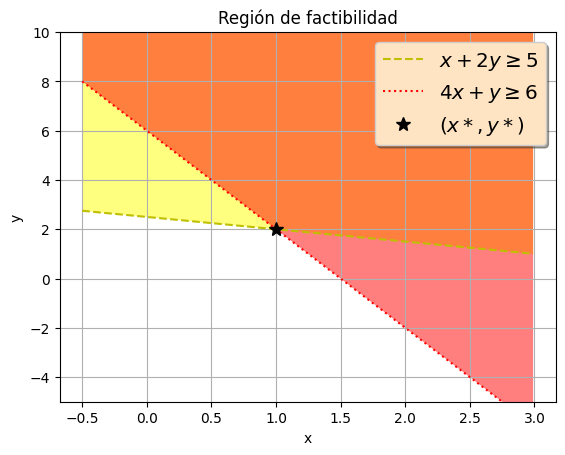

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
x = np.arange(-0.5, 3.0, 0.01)
y1 = (5 - x)/2
y2 = 6 - 4*x

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x, y1, 'y--', label=r'$x+2y \geq 5$')
ax.plot(x, y2, 'r:', label=r'$4x+y \geq 6$')
ax.plot([1], [2], 'k',linewidth = 0,marker = '*',  markersize=10, label=r'$(x*,y*)$')

ax.grid()
ax.set(xlabel='x', ylabel='y',
       title='Región de factibilidad')

ax.fill_between(x, y1, 10, where=(x + 2*y1 >= 5), facecolor='yellow', alpha=0.5)
ax.fill_between(x, y2, 10, where=(4*x + y2 >= 6), facecolor='red', alpha=0.5)

ax.set_ylim((-5, 10))
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('bisque')

plt.show()

Ejercicio:
--
Encontrar la solución y graficar la región factible del siguiente LP.
$$
\begin{align*}
    \max x + y \\
    y \geq 2 \\
    2x - y \geq 5 \\
    x+2y \leq 25 \\
    2x-4y \leq 8
\end{align*}
$$

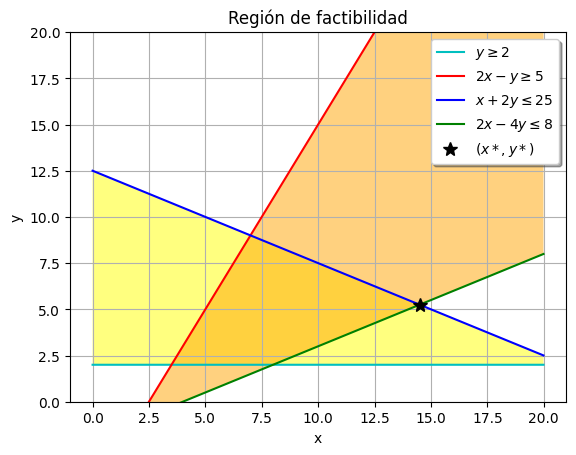

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects

fig, ax = plt.subplots()
d = np.linspace(0,20,300)
x,y = np.meshgrid(d,d)
#obj = x+y
#cntr = ax.contour(x, y, obj, [4,8,12,18], colors='black')
#ax.contour(x, y, 2+x*0, [0], colors='sandybrown',path_effects=[patheffects.withTickedStroke(angle=135)])

x = np.arange(0, 20, 0.01)
ax.plot(x, 2+x*0, 'c', label=r'$y \geq 2$')
#ax.plot(x, 2+x*0, 'c', label=r'$y \geq 2$', path_effects=[patheffects.withTickedStroke(spacing=7, angle=135)])
ax.plot(x, 2*x-5, 'r', label=r'$2x-y \geq 5$')
ax.plot(x, (25-x)/2, 'b-', label=r'$x+2y \leq 25$')
ax.plot(x, (2*x-8)/4, 'g-', label=r'$2x-4y \leq 8$')
ax.plot([29/2], [21/4], 'k',linewidth = 0,marker = '*',  markersize=10, label=r'$(x*,y*)$')
#idx = np.argwhere(np.diff(np.sign((25-x)/2 - (2*x-8)/4))).flatten()
#plt.plot(x[idx], ((2*x-8)/4)[idx], 'ro')

ax.grid()
ax.set(xlabel='x', ylabel='y',
       title='Región de factibilidad')

ax.fill_between(x, 2+x*0, (25-x)/2, facecolor='yellow', alpha=0.5)
ax.fill_between(x,(2*x-8)/4, 2*x-5, facecolor='orange', alpha=0.5)

ax.set_ylim((0, 20))
legend = ax.legend(loc='upper right', shadow=True, fontsize='medium')


plt.show()

## Otras formas de graficar:

Si queremos colorear solo la region factible

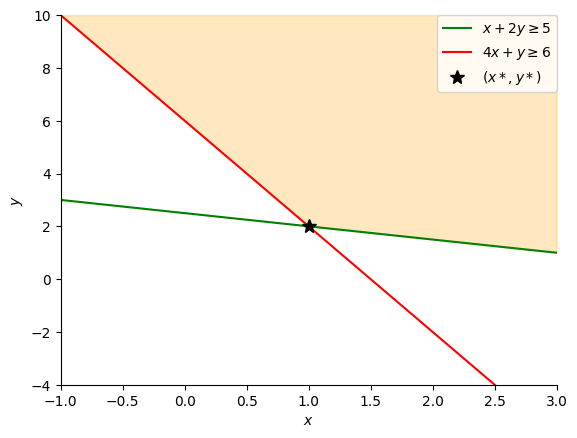

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 3, 1000)

# creamos un grafico
fig, ax = plt.subplots()

# cambiamos la dimension de la figura
#fig.set_size_inches(10, 8) 

# graficamos las rectas
plt.plot(x, (5 - x)/2,color = 'g', label=r'$x+2y \geq 5$') # constraint 1
plt.plot(x, 6 - 4*x,color = 'r', label=r'$4x+y \geq 6$') # constraint 2

# graficamos el punto optimo
ax.plot([1], [2], 'k',linewidth = 0,marker = '*',  markersize=10, label=r'$(x*,y*)$')

# ajustamos los limites de los ejes
plt.xlim((-1, 3))
plt.ylim((-4, 10))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# coloreamos la region factible
plt.fill_between(x, np.maximum(6 - 4*x,(5 - x)/2),10,color='orange', alpha=0.25)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

# Ocultamos las lineas para dar la idea que es un poliedro infinito
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

O si queremos compactar la region factible

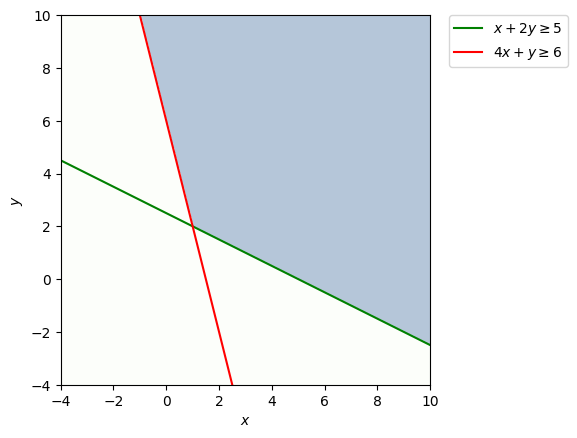

In [7]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Primero coloreamos la region factible
d = np.linspace(-4,10,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((x+2*y >= 5) & (4*x+y >=6) ).astype(int) , extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="GnBu", alpha = 0.3)

# Luego agregamos las rectas
x = np.linspace(-4, 10, 2000)
ax.plot(x, (5 - x)/2,color = 'g', label=r'$x+2y \geq 5$') # constraint 1
ax.plot(x, 6 - 4*x,color = 'r', label=r'$4x+y \geq 6$') # constraint 2

plt.xlim(-4,10)
plt.ylim(-4,10)
# agregamos la leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

Al problema anterior se le conoce como un problema de programación lineal debido a que sus restricciones son solo desigualdades o ecuaciones lineales. Y se dice de optimización, pues su función objetivo consiste en minimizar o maximizar una función, se desea que esta sea lineal, pero existen problemas para los cuales no es posible dicha formulación. 

En este curso nos enfocaremos en problemas de optimización lineal o mejor conocidos como problemas LP (linear programming) si sus restricciones son lineales.

La forma canónica de un problema LP es:

$$
\begin{align*}
    \min c^T x \\
    \mathrm{s.r.}\\
    Ax \leq b \\
    x \geq 0
\end{align*}
$$

__Nota:__ Sin pérdida de generalidad uno puede asumir siempre un problema de minimización. Sin embargo, en ocaciones es preferible resolver el problema de maximización.

Uno puede clasificar los modelos en dos tipos: modelos concretos y modelos abstractos.

__Modelos Concretos:__ Decimos que es concreto si es un problema para un caso particular. Por ejemplo el Problema:
$$
\begin{align*}
    \min x + y \\
    x + 2y \geq 5\\
    4x + y \geq 6
\end{align*}
$$
Es un modelo concreto. No hay parámetros generales.

__Modelos Abstractos:__ Estos son modelos más generales, uno debe definir variables, parámetros, conjuntos, desigualdades, etc. Por ejemplo si escribimos un modelo en su forma canónica, asignando ciertas características a las desigualdades y a las regiones de factibilidad, uno tendría un modelo abstracto. También se los conoce como problemas de la literatura. Por ejemplo, el problema de horarios para universidades tiene un modelo abstracto. Sin embargo, si nosotros aplicamos este modelo a un caso particular de la EPN. Es decir, si solo lo vamos a usar una sola vez para un conjunto de parámetros específicos dejaría de ser un modelo abstracto y se convertiría en concreto.

## Esquema de resolución:

* Identificar el problema -> Preguntarse: que tipo de modelo es..?? -> Lo puedo resolver...?? -> Qué parámetros necesita..??

* Escribir el modelo matemático -> Preguntarse: es posible resolver..?? -> cuál es lenguaje que me conviene...?? Qué solver usaré...??

* Implementar el modelo (Escribir el algoritmo) -> Hacer pruebas computacionales con ejemplos pequeños para comprobar la correcta implementación del problema.

* Presentar los resultados -> Debemos ser capaces de dar una solución al problema de forma que sea comprensible para cualquier persona que tenga dicho problema.

## Problemas que debemos conocer de la programación lineal:

A continuación se describen algunos problemas clásicos de la programación lineal.

1. Problema de la Mochila.
2. Problema del Transporte.
3. Problema de la Dieta.
4. Problema del Agente viajero.
5. Problema de horarios (Planificación de horarios)
6. Problema de costos mínimos (camino más corto)
7. Problema de mezcla de ingredientes.
8. Bin Packing problem (Empaquetamiento)
9. Problema de Coloramiento de Grafos.

## Pasos para escribir el modelo matemático:

1. Identificar los parámetros (si es posible ir escribiendo los conjuntos).
2. Identificar la función objetivo (el problema es minimización de qué..?? ).
3. Identificar las variables para poder escribir dicha función objetivo.
4. Identificar las restricciones del problema (fuertes y débiles).
5. Revisar los parámetros y si es necesario modificarlos.

$$
\begin{array}{lr}
    \min c^T x & \textrm{Función objetivo} \\
    \mathrm{s.r.} & \\
    Ax \leq b & \textrm{Restricciones} \\
    x \geq 0 & \textrm{"Restricciones"}
\end{array}
$$

Deber
--
Resolver el siguiente sistema de forma gráfica.
1. Mostrar la región factible.
2. Indicar el punto donde se encuentra una solución óptima.

$$
\begin{array}{lll}
  \min & x + y\\
  \textrm{s.t.} & 2x + 3y \ge 6\\
                & 4x + 2y \le 7\\
                & x,y \ge 0
\end{array}
$$